In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv")
df_test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')

In [ ]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


In [ ]:
df.shape

(48260, 11)

In [ ]:
df_test.head()

In [ ]:
df_test.shape

(15832, 10)

## Detecting null values

In [ ]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

### Treating null values

In [ ]:
df['Gender'].mode()

0    M
dtype: object

In [ ]:
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])

In [ ]:
df['Gender'].isnull().sum()

0

## Detecting duplicat value

In [ ]:
df.duplicated().sum()

5912

### Treating duplicate value

In [ ]:
df = df.drop(df[df.duplicated()].index)

In [ ]:
df[df.duplicated()]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim


## View target data

In [ ]:
df['Claim'].value_counts()

0    41656
1      692
Name: Claim, dtype: int64

## View Categorical data

In [ ]:
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
Claim                     int64
dtype: object

In [ ]:
df.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Duration                 442
Destination              141
Net Sales               1005
Commision (in value)     922
Gender                     2
Age                       88
Claim                      2
dtype: int64

In [ ]:
df["Agency Type"].unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [ ]:
df["Distribution Channel"].unique()

array(['Online', 'Offline'], dtype=object)

In [ ]:
df["Gender"].unique()

array(['M', 'F'], dtype=object)

### One hot encoding

In [ ]:
df['Agency'] = df['Agency'].astype('category')
df['Product Name'] = df['Product Name'].astype('category')
df['Destination'] = df['Destination'].astype('category')

In [ ]:
df_test['Agency'] = df_test['Agency'].astype('category')
df_test['Product Name'] = df_test['Product Name'].astype('category')
df_test['Destination'] = df_test['Destination'].astype('category')

In [ ]:
df['Agency_cat'] = df['Agency'].cat.codes
df['Product Name_cat'] = df['Product Name'].cat.codes
df['Destination_cat'] = df['Destination'].cat.codes

In [ ]:
df_test['Agency_cat'] = df_test['Agency'].cat.codes
df_test['Product Name_cat'] = df_test['Product Name'].cat.codes
df_test['Destination_cat'] = df_test['Destination'].cat.codes

In [ ]:
df = pd.concat([df,pd.get_dummies(df["Agency Type"],prefix='d')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test["Agency Type"],prefix='d')],axis=1)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Distribution Channel'],prefix='d')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Distribution Channel'],prefix='d')],axis=1)

In [ ]:
df = pd.concat([df,pd.get_dummies(df['Gender'],prefix='d')],axis=1)
df_test = pd.concat([df_test,pd.get_dummies(df_test['Distribution Channel'],prefix='d')],axis=1)

In [ ]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim,Agency_cat,Product Name_cat,Destination_cat,d_Airlines,d_Travel Agency,d_Offline,d_Online,d_F,d_M
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,M,29,0,6,16,131,0,1,0,1,0,1
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,M,36,0,7,10,90,0,1,0,1,0,1
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,M,25,0,7,1,132,0,1,0,1,0,1
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0,2,17,112,1,0,0,1,0,1
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,M,23,0,7,10,137,0,1,0,1,0,1


In [ ]:
df_test.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Agency_cat,Product Name_cat,Destination_cat,d_Airlines,d_Travel Agency,d_Offline,d_Online,d_Offline,d_Online
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36,7,10,38,0,1,0,1,0,1
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36,7,10,48,0,1,0,1,0,1
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21,7,10,48,0,1,0,1,0,1
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30,7,10,92,0,1,0,1,0,1
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33,7,10,61,0,1,0,1,0,1


## Select features

In [ ]:
df = df.drop(["Agency","Agency Type","Distribution Channel", "Product Name", "Destination", "Gender"], axis=1)

In [ ]:
df_test = df_test.drop(["Agency","Agency Type","Distribution Channel", "Product Name", "Destination", "Gender"], axis=1)

## SMOTE for balancing data

In [ ]:
#!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Select features
x = df.drop(['Claim'], axis=1)
y = df.Claim

#define pipelines
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

#transform the dataset
x,y = pipeline.fit_resample(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Counter({0: 8330, 1: 4165})


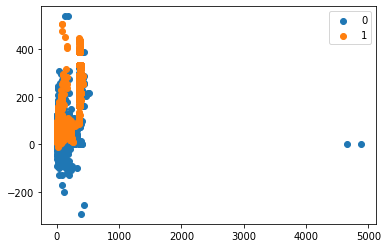

In [ ]:
from collections import Counter
from matplotlib import pyplot
from numpy import where


# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(x[row_ix, 0], x[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Split the features

In [ ]:
#train test split
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=47)

## Create the model

### Search best model

In [ ]:
#!pip install lazypredict
from sklearn import model_selection
from lazypredict.Supervised import LazyClassifier
from sklearn import metrics

#Search best model
#clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
models

NameError: ignored

### Create model

In [ ]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier


# evaluate pipeline
model = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
print(f'Mean F1: {mean(scores)}')

Mean F1: 0.8618327920937521


In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
#calculate accuracy
print("F1 Score: ",f1_score(y_test, preds))

F1 Score:  0.8711734693877551


## Hyperparameter

In [ ]:
param_grid = {
    'max_depth': [30,40,50],
    'max_features': ["log2"],
    'min_samples_leaf': [1],
    'min_samples_split': [2,3],
    'n_estimators': [800,1200],
    }

### GridsearchCV

In [ ]:
from sklearn import model_selection


# initialize grid search
model_grid = model_selection.GridSearchCV(
              estimator = model,
              param_grid = param_grid, 
              verbose = 10,
              n_jobs = 1
)

# fit the model and extract best score
#model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] learning_rate=0.03, max_depth=30, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=800 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: ignored

In [ ]:
model_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
model_grid.best_params_

{'max_depth': 40,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [ ]:
model_grid.best_score_

0.908464632316158

In [ ]:
#best parameters
model_grid = RandomForestClassifier(
            'max_features': 'log2',
            'min_samples_leaf': 1,
            'min_samples_split': 5,
            'n_estimators': 800
)

In [ ]:
preds_2 = model_grid.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
#calculate accuracy
print("F1 Score: ",f1_score(y_test, preds_2))

F1 Score:  0.8698979591836734


### RandomsearchCV

In [ ]:
parameters = {
    'n_estimators': [5, 50, 100, 150, 250],
    'max_depth': [2, 3, 4, 8, 16, 32, None],
    'learning_rate': [0.03, 0.1, 0.3, 1]
}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [ ]:
# initialize random search
model_random = model_selection.RandomizedSearchCV(
              gbc,
              parameters, 
              n_iter=5,
              scoring='f1',
              n_jobs=-1,
              verbose=3
)

# fit the model and extract best score
model_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                 

In [ ]:
model_random.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1, loss='deviance', max_depth=16,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
model_random.best_params_

{'learning_rate': 1, 'max_depth': 16, 'n_estimators': 50}

In [ ]:
model_random.best_score_

0.8574306556894337

In [ ]:
preds_3 = model_random.best_estimator_.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
#calculate accuracy
print("F1 Score: ",f1_score(y_test, preds_3))

F1 Score:  0.8721147847785403


## Prediction for submitting


In [ ]:
#Grid_search the best model
preds_submit = model_grid.best_estimator_.predict(df_test)
predictions = pd.DataFrame(preds_submit, columns=["prediction"])
predictions.index = df_test.index
from google.colab import files
predictions.to_csv('class_pred_1.csv')
files.download('class_pred_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Feature selection

### Train a Random Forest Classifier (Baseline Model)

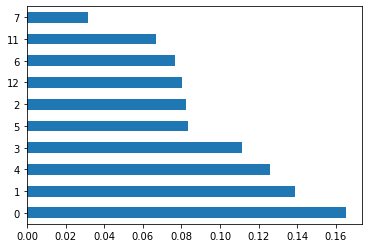

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a random forest classifier
rf_clf = model
# n_estimators = The number of trees in the forest.
# n_jobs = -1 : Use all processors for training

# Train the classifier
rf_clf.fit(X_train, y_train)

X_train_df = pd.DataFrame(X_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=X_train_df.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Identify and Select Most Important Features

In [ ]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# It will select the features based on the importance score
rf_sfm = SelectFromModel(rf_clf)

#Alternatively if you want to set a specific threshold and select the features you may the following code that is commented
# features that have an importance of more than 0.13 ( all top 4 features lie above this)
# rf_sfm = SelectFromModel(rf_clf, threshold=0.13)

# Train the selector
rf_sfm = rf_sfm.fit(X_train, y_train)

### Create a new subset of the data with only the selected features

In [ ]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)
X_important_val = rf_sfm.transform(df_test)

### Train a new Random Forest Classifier using selected important features

In [ ]:
# Create a new random forest classifier for the most important features
clf_important = model_grid

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

### Model performance with feature selection

In [ ]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Model F1 Score:", rf_imp_fscore)

Limited Features Model F1 Score: 0.857685009487666


In [ ]:
preds_submit = clf_important.predict(X_important_val)
predictions = pd.DataFrame(preds_submit, columns=["prediction"])
predictions.index = df_test.index
from google.colab import files
predictions.to_csv('class_pred_2.csv')
files.download('class_pred_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>